In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
cust=pd.read_csv("Mall_customers.csv")

In [179]:
cust.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [180]:
cust.shape

(200, 5)

In [181]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [182]:
cust.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [183]:
cust.select_dtypes("object") 

,Genre
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


In [184]:
cust["Genre"]=le.fit_transform(cust["Genre"])
cust.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [185]:
X=cust.iloc[:,:-1]
Y=cust.iloc[:,-1]

In [186]:
from sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(X,Y,test_size=0.6,random_state=42)

In [187]:
X.head()

,CustomerID,Genre,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [188]:
Y.head()

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

In [189]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x1,y1)

LinearRegression()

In [190]:
model.coef_

array([-2.73078725e-03, -2.91870619e+00, -5.96185254e-01,  1.13482263e-02])

In [191]:
model.predict(x2[:2])

array([60.27862021, 61.23552464])

In [192]:
model.score(x2,y2)*1000

70.9745830546994

In [193]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(cust["Genre"])

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

C:\Users\MANYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

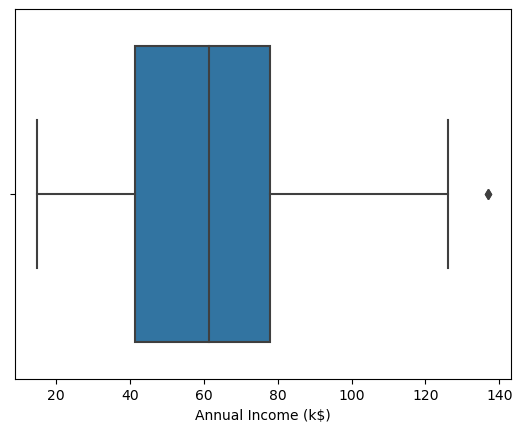

In [194]:
sns.boxplot(cust["Annual Income (k$)"])

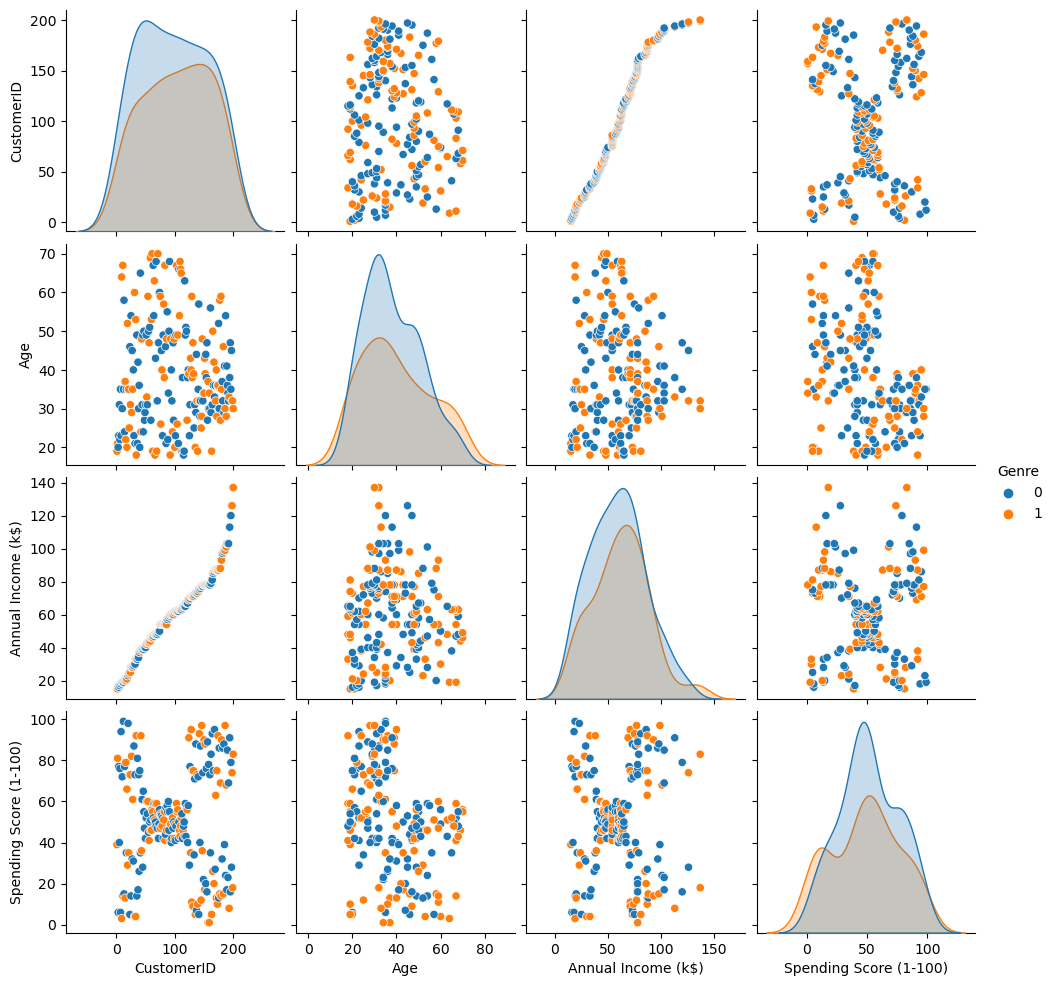

In [195]:
sns.pairplot(cust,hue='Genre')

In [196]:
cust.groupby(['Genre'])['Age','Annual Income (k$)',
                        'Spending Score (1-100)'].mean()

C:\Users\MANYA\AppData\Local\Temp\ipykernel_32388\771731444.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cust.groupby(['Genre'])['Age','Annual Income (k$)',


,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
0,38.098214,59.250000,51.526786
1,39.806818,62.227273,48.511364


In [197]:
x=cust.iloc[:,[3,4]].values

In [198]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

<AxesSubplot:>

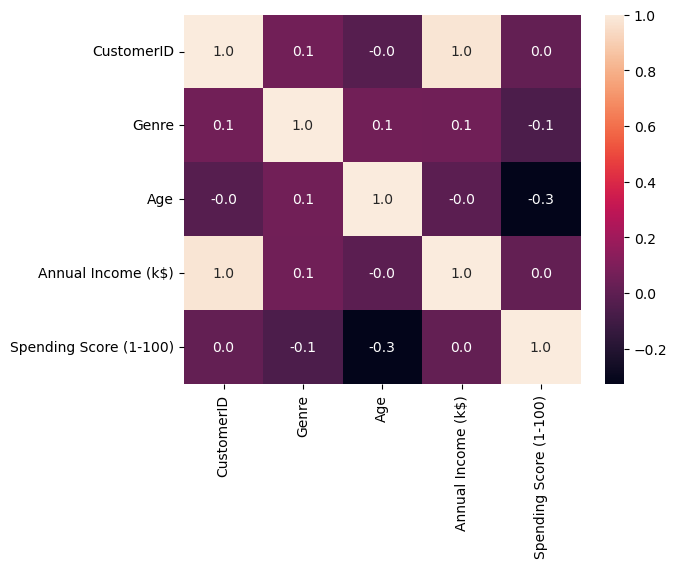

In [201]:
sns.heatmap(cust.corr(),annot=True,fmt="0.1f")

In [202]:
kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [203]:
y_kmeans=kmeansmodel.fit_predict(x)

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

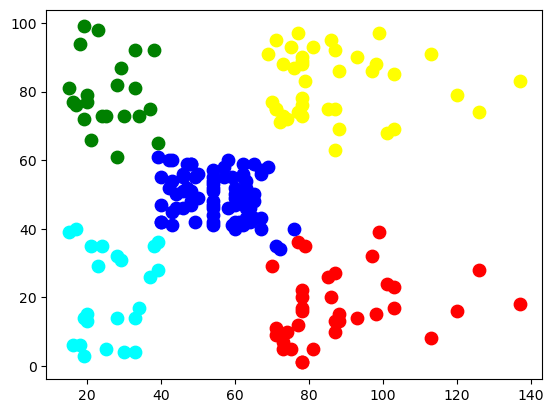

In [204]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=80,c="red",label="cust 1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=80,c="blue",label="cust 2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=80,c="yellow",label="cust 3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=80,c="green",label="cust 4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=80,c="cyan",label="cust 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta',label='Centroids')
plt.title("clusters of customers")
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Genre', ylabel='count'>

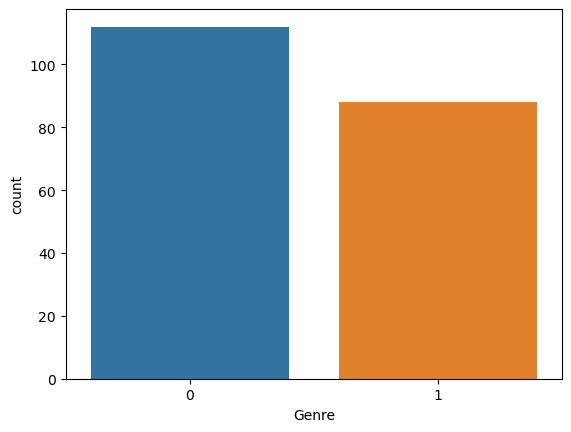

In [205]:
sns.countplot(data=cust,x="Genre") 